## Loading Data

In [4]:
# Importing Modules
import pandas as pd

review = pd.read_csv("product_reviews.csv")

## Data Cleaning

### 1. Select only the Text columns

In [5]:
columns = ["name", "reviews.username", "reviews.rating", "reviews.title", "reviews.text"]
review = pd.DataFrame(review, columns=columns)
# rename the column names
review = review.rename(columns={'reviews.username': 'username', 'reviews.rating': 'rating', 'reviews.title': 'title', 'reviews.text': 'text'})
review

name            username  \
0                                     Kindle Paperwhite          Cristina M   
1                                     Kindle Paperwhite               Ricky   
2                                     Kindle Paperwhite       Tedd Gardiner   
3                                     Kindle Paperwhite              Dougal   
4                                     Kindle Paperwhite  Miljan David Tanic   
...                                                 ...                 ...   
1592  Alexa Voice Remote for Amazon Fire TV and Fire...     GregAmandawith4   
1593  Alexa Voice Remote for Amazon Fire TV and Fire...     Amazon Customer   
1594  Alexa Voice Remote for Amazon Fire TV and Fire...     Amazon Customer   
1595  Alexa Voice Remote for Amazon Fire TV and Fire...          Meg Ashley   
1596  Alexa Voice Remote for Amazon Fire TV and Fire...             DIANE K   

      rating                                              title  \
0        5.0                     Paperwhite voyage, no regrets!   
1        5.0                  One Simply Could Not Ask For More   
2        4.0         Great for those that just want an e-reader   
3        5.0                           Love / Hate relationship   
4        5.0                                          I LOVE IT   
...      ...                                                ...   
1592     3.0  I would be disappointed with myself if i produ...   
1593     1.0                        Battery draining remote!!!!   
1594     1.0      replacing an even worse remote. Waste of time   
1595     3.0                                         Overpriced   
1596     1.0  I am sending all of this crap back to amazon a...   

                                                   text  
0     I initially had trouble deciding between the p...  
1     Allow me to preface this with a little history...  
2     I am enjoying it so far. Great for reading. Ha...  
3     I bought one of the first Paperwhites and have...  
4     I have to say upfront - I don't like coroporat...  
...                                                 ...  
1592  This is not the same remote that I got for my ...  
1593  I have had to change the batteries in this rem...  
1594  Remote did not activate, nor did it connect to...  
1595  It does the job but is super over priced. I fe...  
1596  I ordered this item to replace the one that no...  

[1597 rows x 5 columns]

### 2. Define function to make text lowercase, remove text in square brackets, remove punctuation, remove read errors, and remove words containing numbers

In [6]:
import re

def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)    
    
    return text

In [7]:
clean = lambda x: clean_text(x)

# clean reviews text
review['cleaned_text'] = review['text'].apply(clean)

# check cleaned text
review.head(100)

name            username  \
0                                   Kindle Paperwhite          Cristina M   
1                                   Kindle Paperwhite               Ricky   
2                                   Kindle Paperwhite       Tedd Gardiner   
3                                   Kindle Paperwhite              Dougal   
4                                   Kindle Paperwhite  Miljan David Tanic   
..                                                ...                 ...   
95  Amazon Echo Dot Case (fits Echo Dot 2nd Genera...        Corey Clarke   
96  Amazon Echo Dot Case (fits Echo Dot 2nd Genera...                 A.C   
97  Amazon Echo Dot Case (fits Echo Dot 2nd Genera...      Vincent Pompei   
98  Amazon Echo Dot Case (fits Echo Dot 2nd Genera...                 Bob   
99  Amazon Echo Dot Case (fits Echo Dot 2nd Genera...               JB 85   

    rating                                              title  \
0      5.0                     Paperwhite voyage, no regrets!   
1      5.0                  One Simply Could Not Ask For More   
2      4.0         Great for those that just want an e-reader   
3      5.0                           Love / Hate relationship   
4      5.0                                          I LOVE IT   
..     ...                                                ...   
95     4.0                 Great case with minor design flaws   
96     5.0  Major fan, didn't buy this because of protecti...   
97     3.0                           Not all fabric or cloth.   
98     5.0                                       She loves it   
99     5.0    Great pop of color for a bland looking product!   

                                                 text  \
0   I initially had trouble deciding between the p...   
1   Allow me to preface this with a little history...   
2   I am enjoying it so far. Great for reading. Ha...   
3   I bought one of the first Paperwhites and have...   
4   I have to say upfront - I don't like coroporat...   
..                                                ...   
95  I love everything about this case except for h...   
96  Major fan, didn't buy this because of protecti...   
97  Like a previous reviewer mentioned it is fabri...   
98  Echo Dot in my GMC Sierra Denali. At first she...   
99  Changes the whole look of the Echo ... after i...   

                                         cleaned_text  
0   i initially had trouble deciding between the p...  
1   allow me to preface this with a little history...  
2   i am enjoying it so far. great for reading. ha...  
3   i bought one of the first paperwhites and have...  
4   i have to say upfront - i don't like coroporat...  
..                                                ...  
95  i love everything about this case except for h...  
96  major fan, didn't buy this because of protecti...  
97  like a previous reviewer mentioned it is fabri...  
98  echo dot in my gmc sierra denali. at first she...  
99  changes the whole look of the echo ... after i...  

[100 rows x 6 columns]

## Exploratory Analysis

### (1) Word Cloud

### We will make a word cloud to get a visual representation of most common words in order to verify whether the preprocessing. It is key to understand the data and ensure we are on the right track, and if there is any more preprocessing is necessary before training the model.

In [8]:
# Import the Wordcloud Library
#!pip install wordcloud
from wordcloud import WordCloud
from nltk.probability import FreqDist

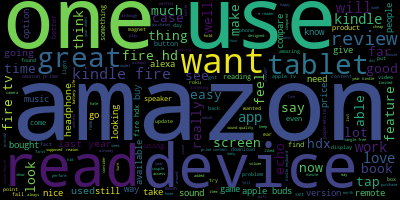

In [9]:
# Join the different processed titles together
long_string = ','.join(list(review['cleaned_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=8000, contour_width=3)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### (2) Bar Plots for Customer Rating Distribution

/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

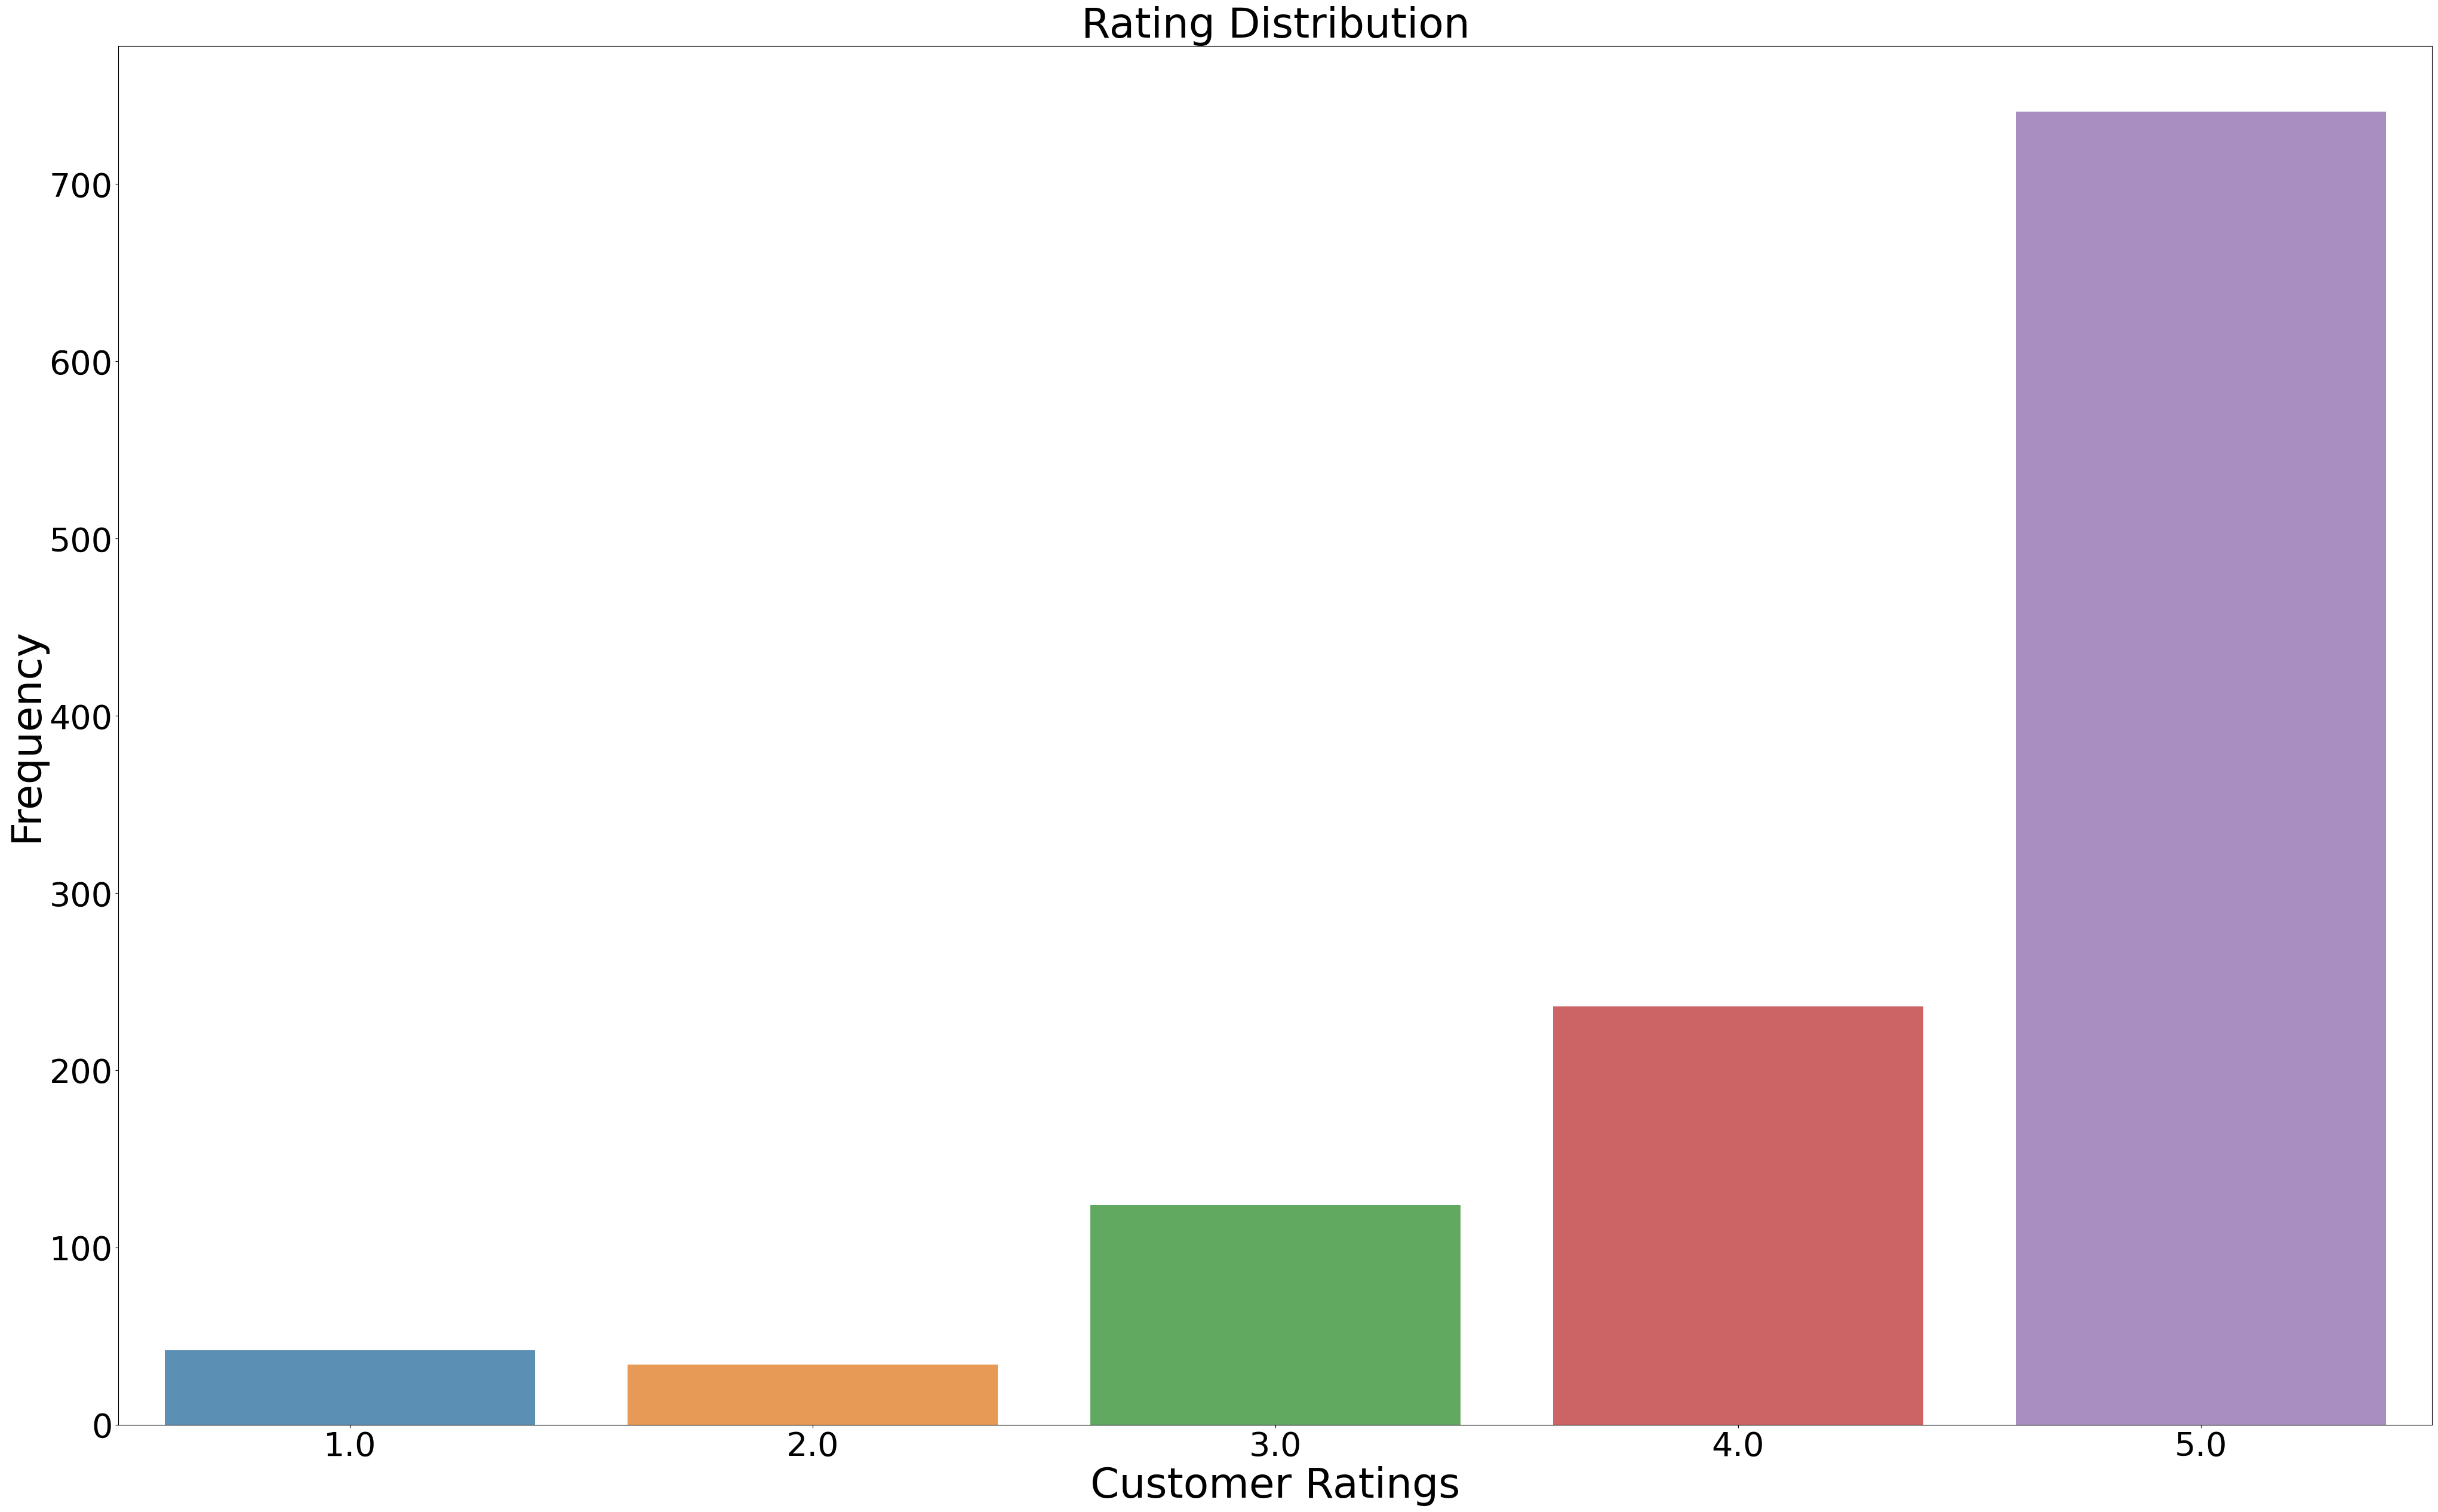

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
x_rating = review.rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Customer Ratings', fontsize=50)
plt.xticks(fontsize=40)

### (3) Bar Plots for Average Number of review letters per Rating Distribution

In [11]:
# Create the column for counting the letters of review text
review['review_len'] = review['cleaned_text'].astype(str).apply(len)

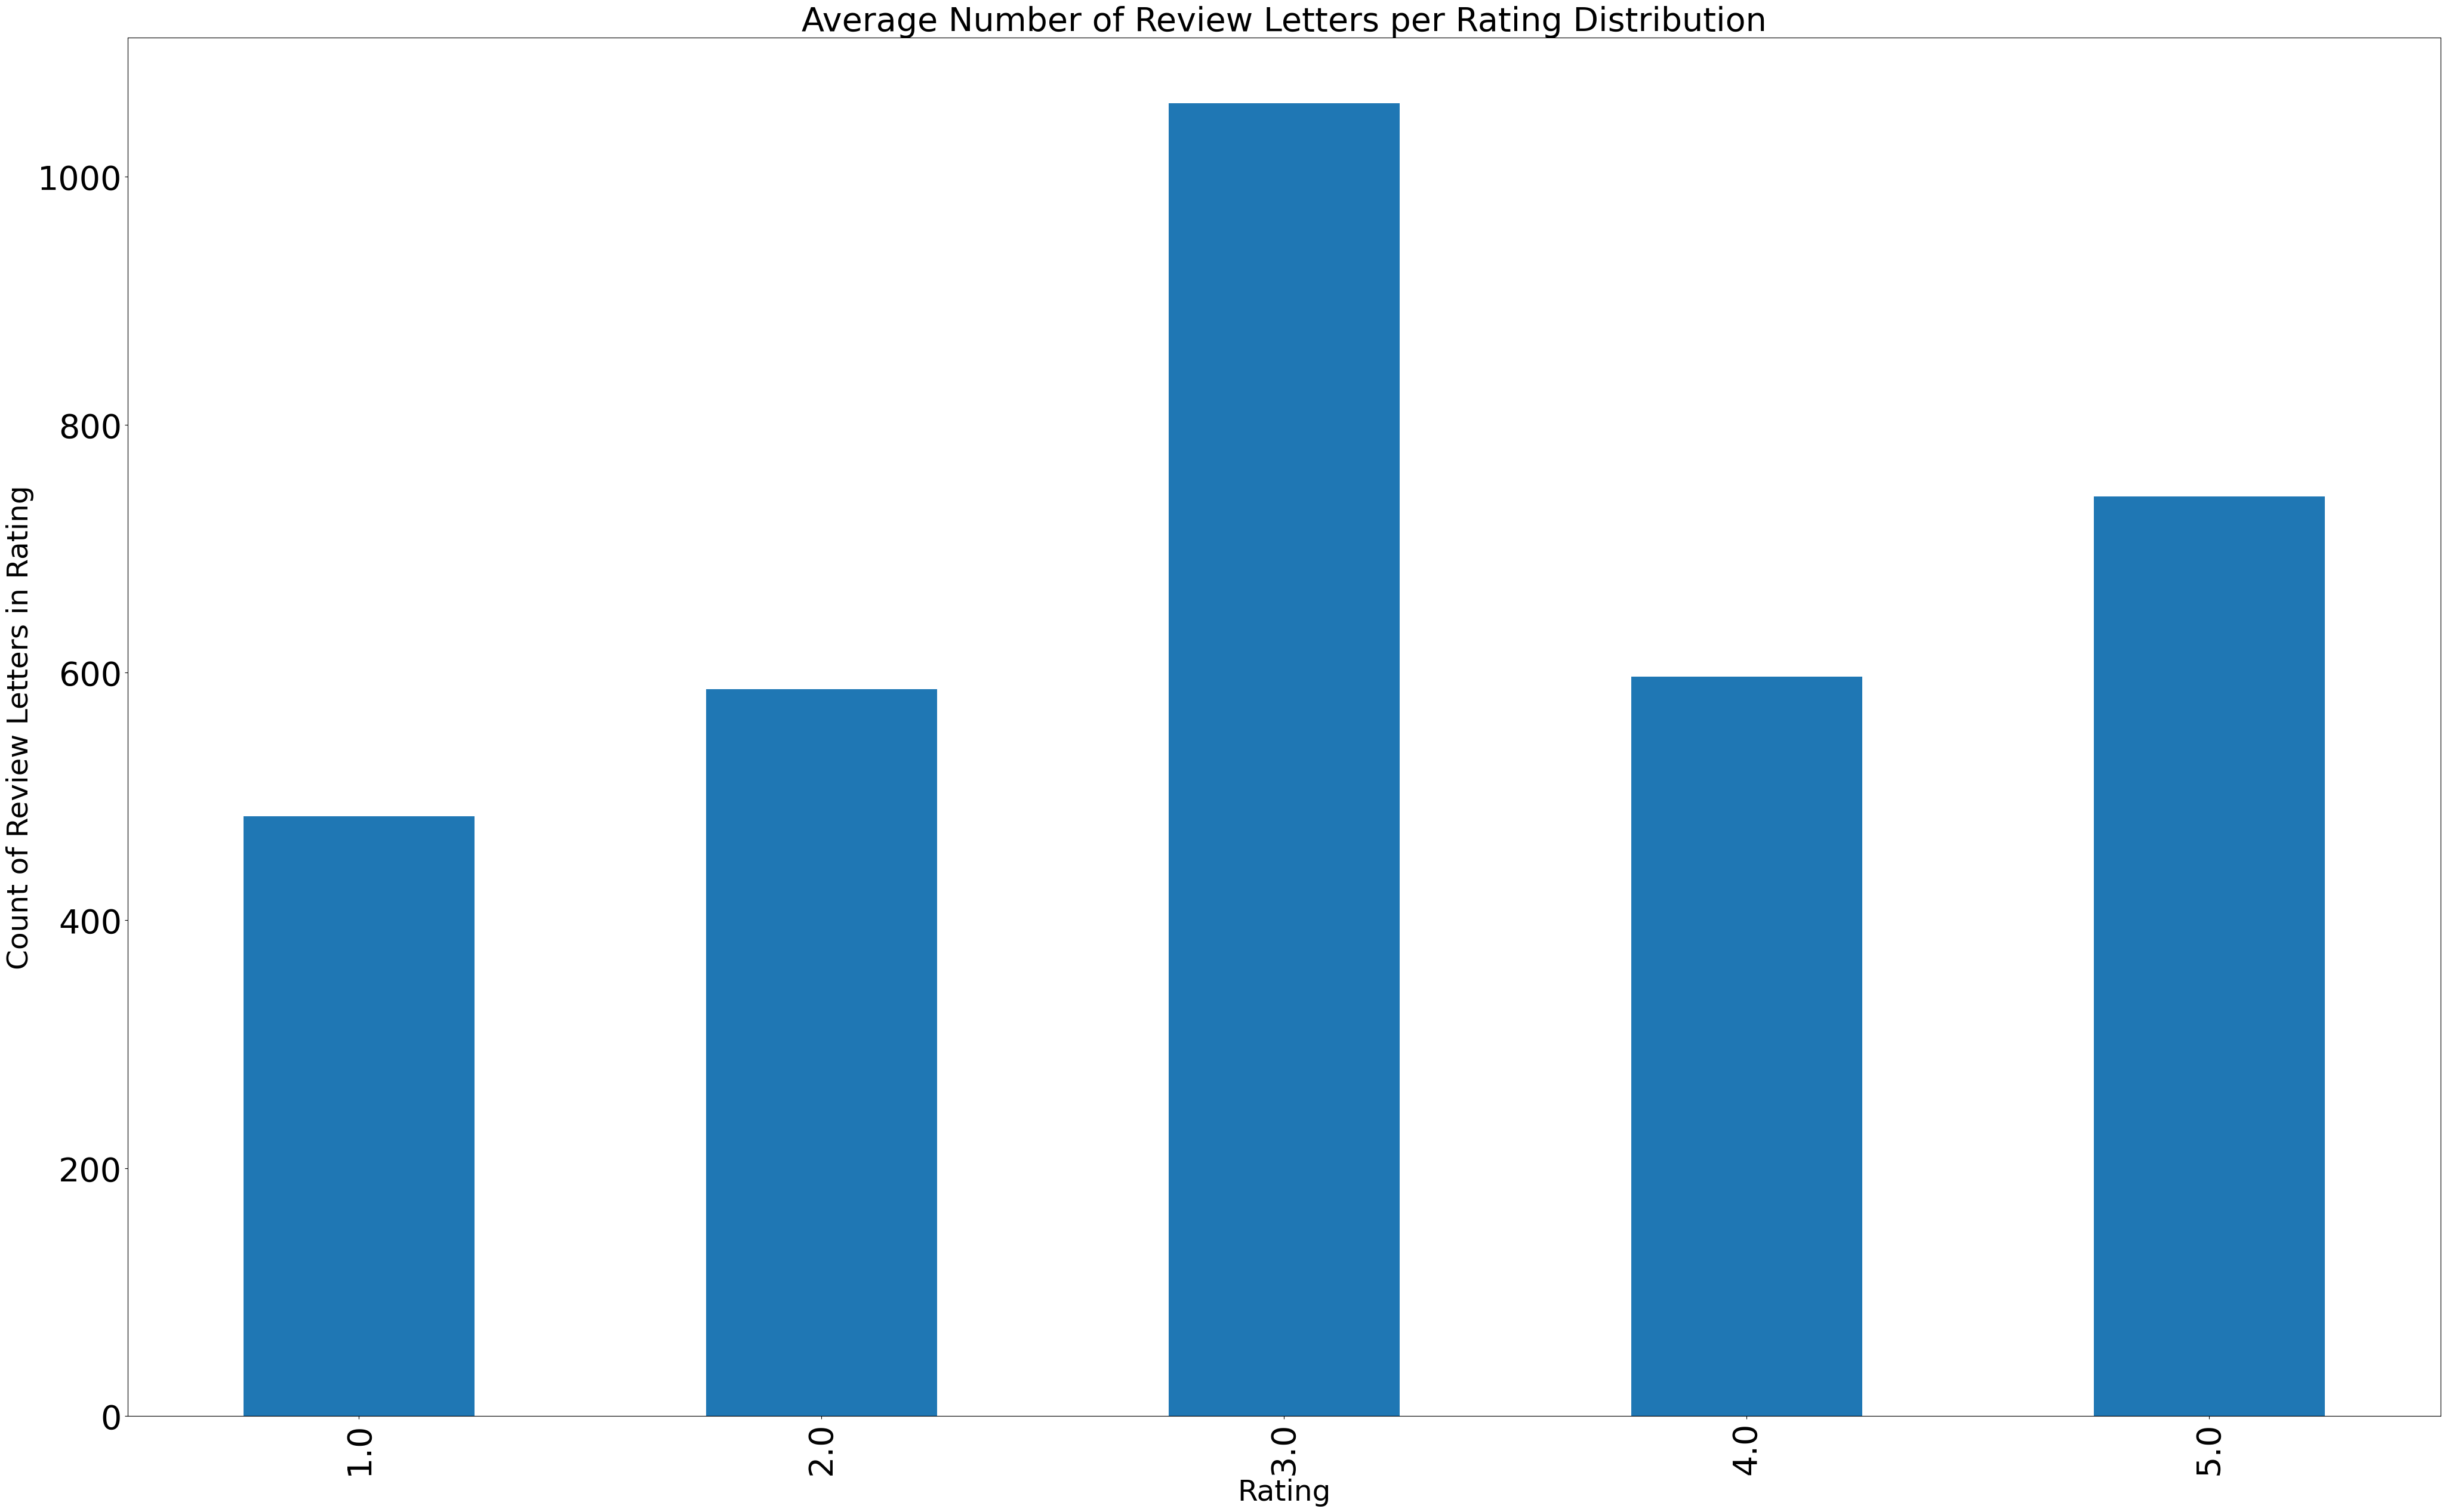

In [12]:
letter_avg = review.groupby('rating')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Review Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Review Letters per Rating Distribution', fontsize=40)
plt.show()

### (4) Bar Plots for Average Number of review words per Rating Distribution

In [13]:
# Create the column for counting the words of review text
review['word_count'] = review['cleaned_text'].apply(lambda x: len(str(x).split()))

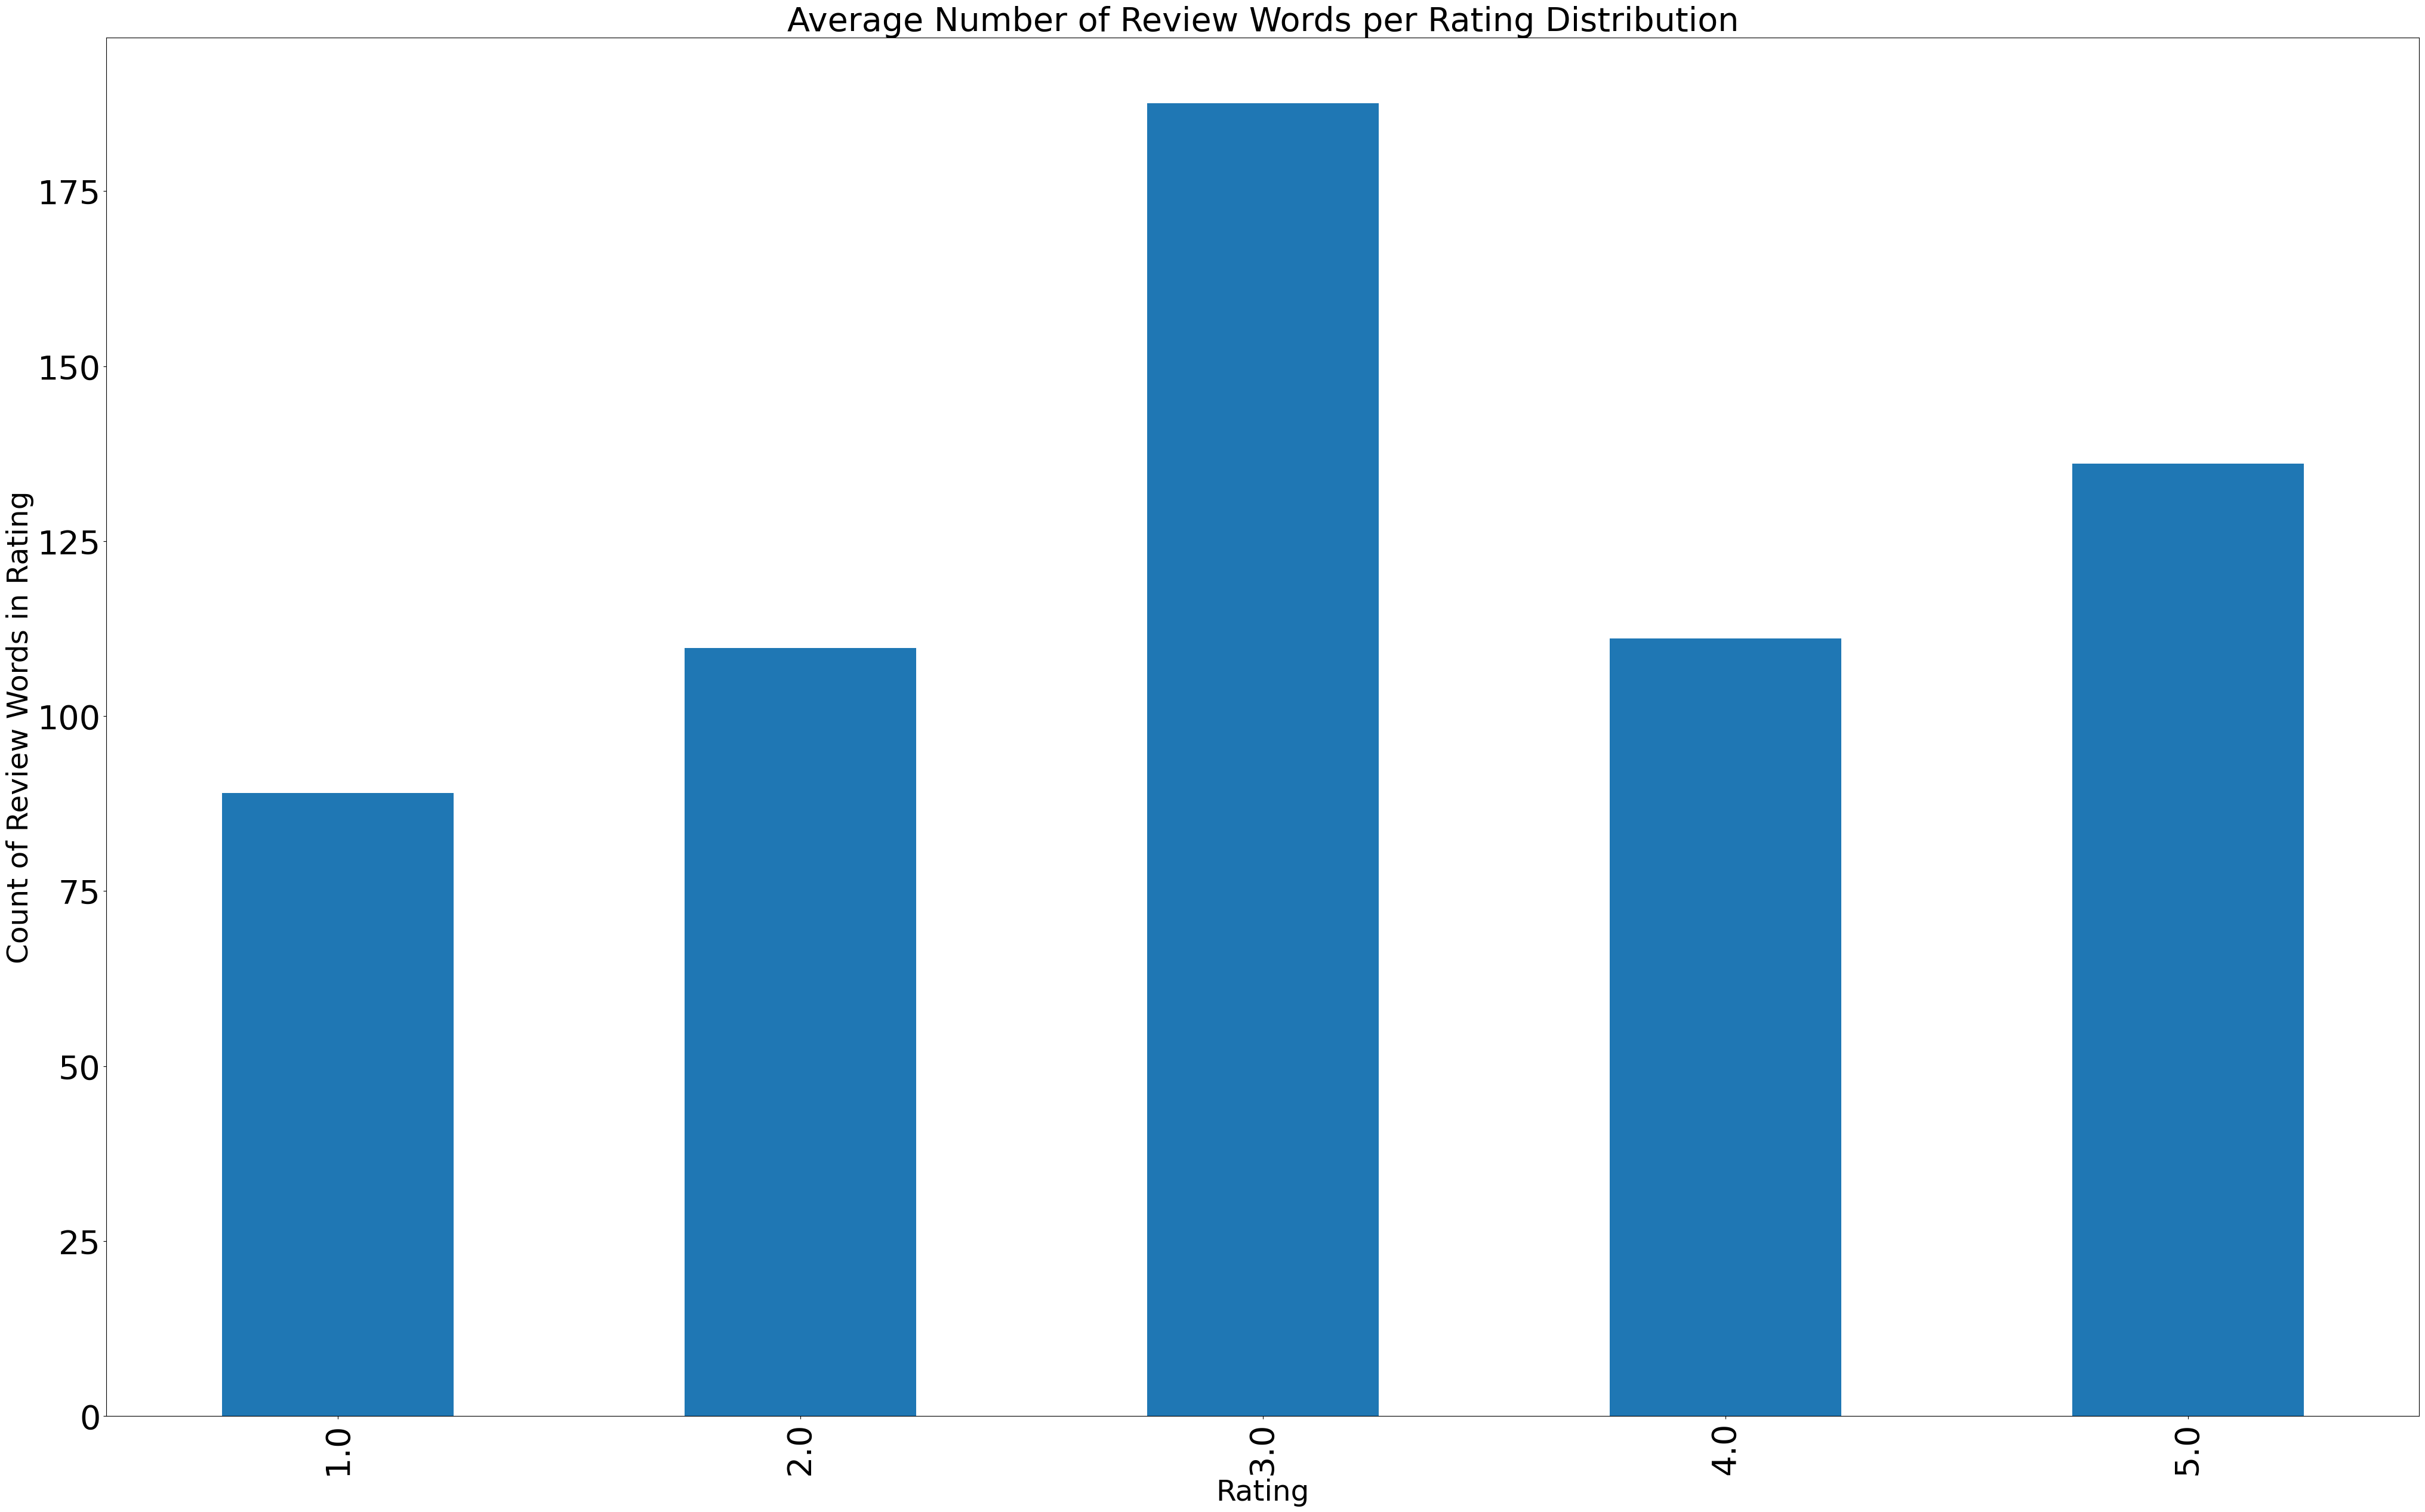

In [14]:
word_avg = review.groupby('rating')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Review Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Review Words per Rating Distribution', fontsize=40)
plt.show()

### (5) Correlation Plot

/var/folders/g9/1lc026g920b410zdzrs8phnc0000gn/T/ipykernel_36933/3613281758.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

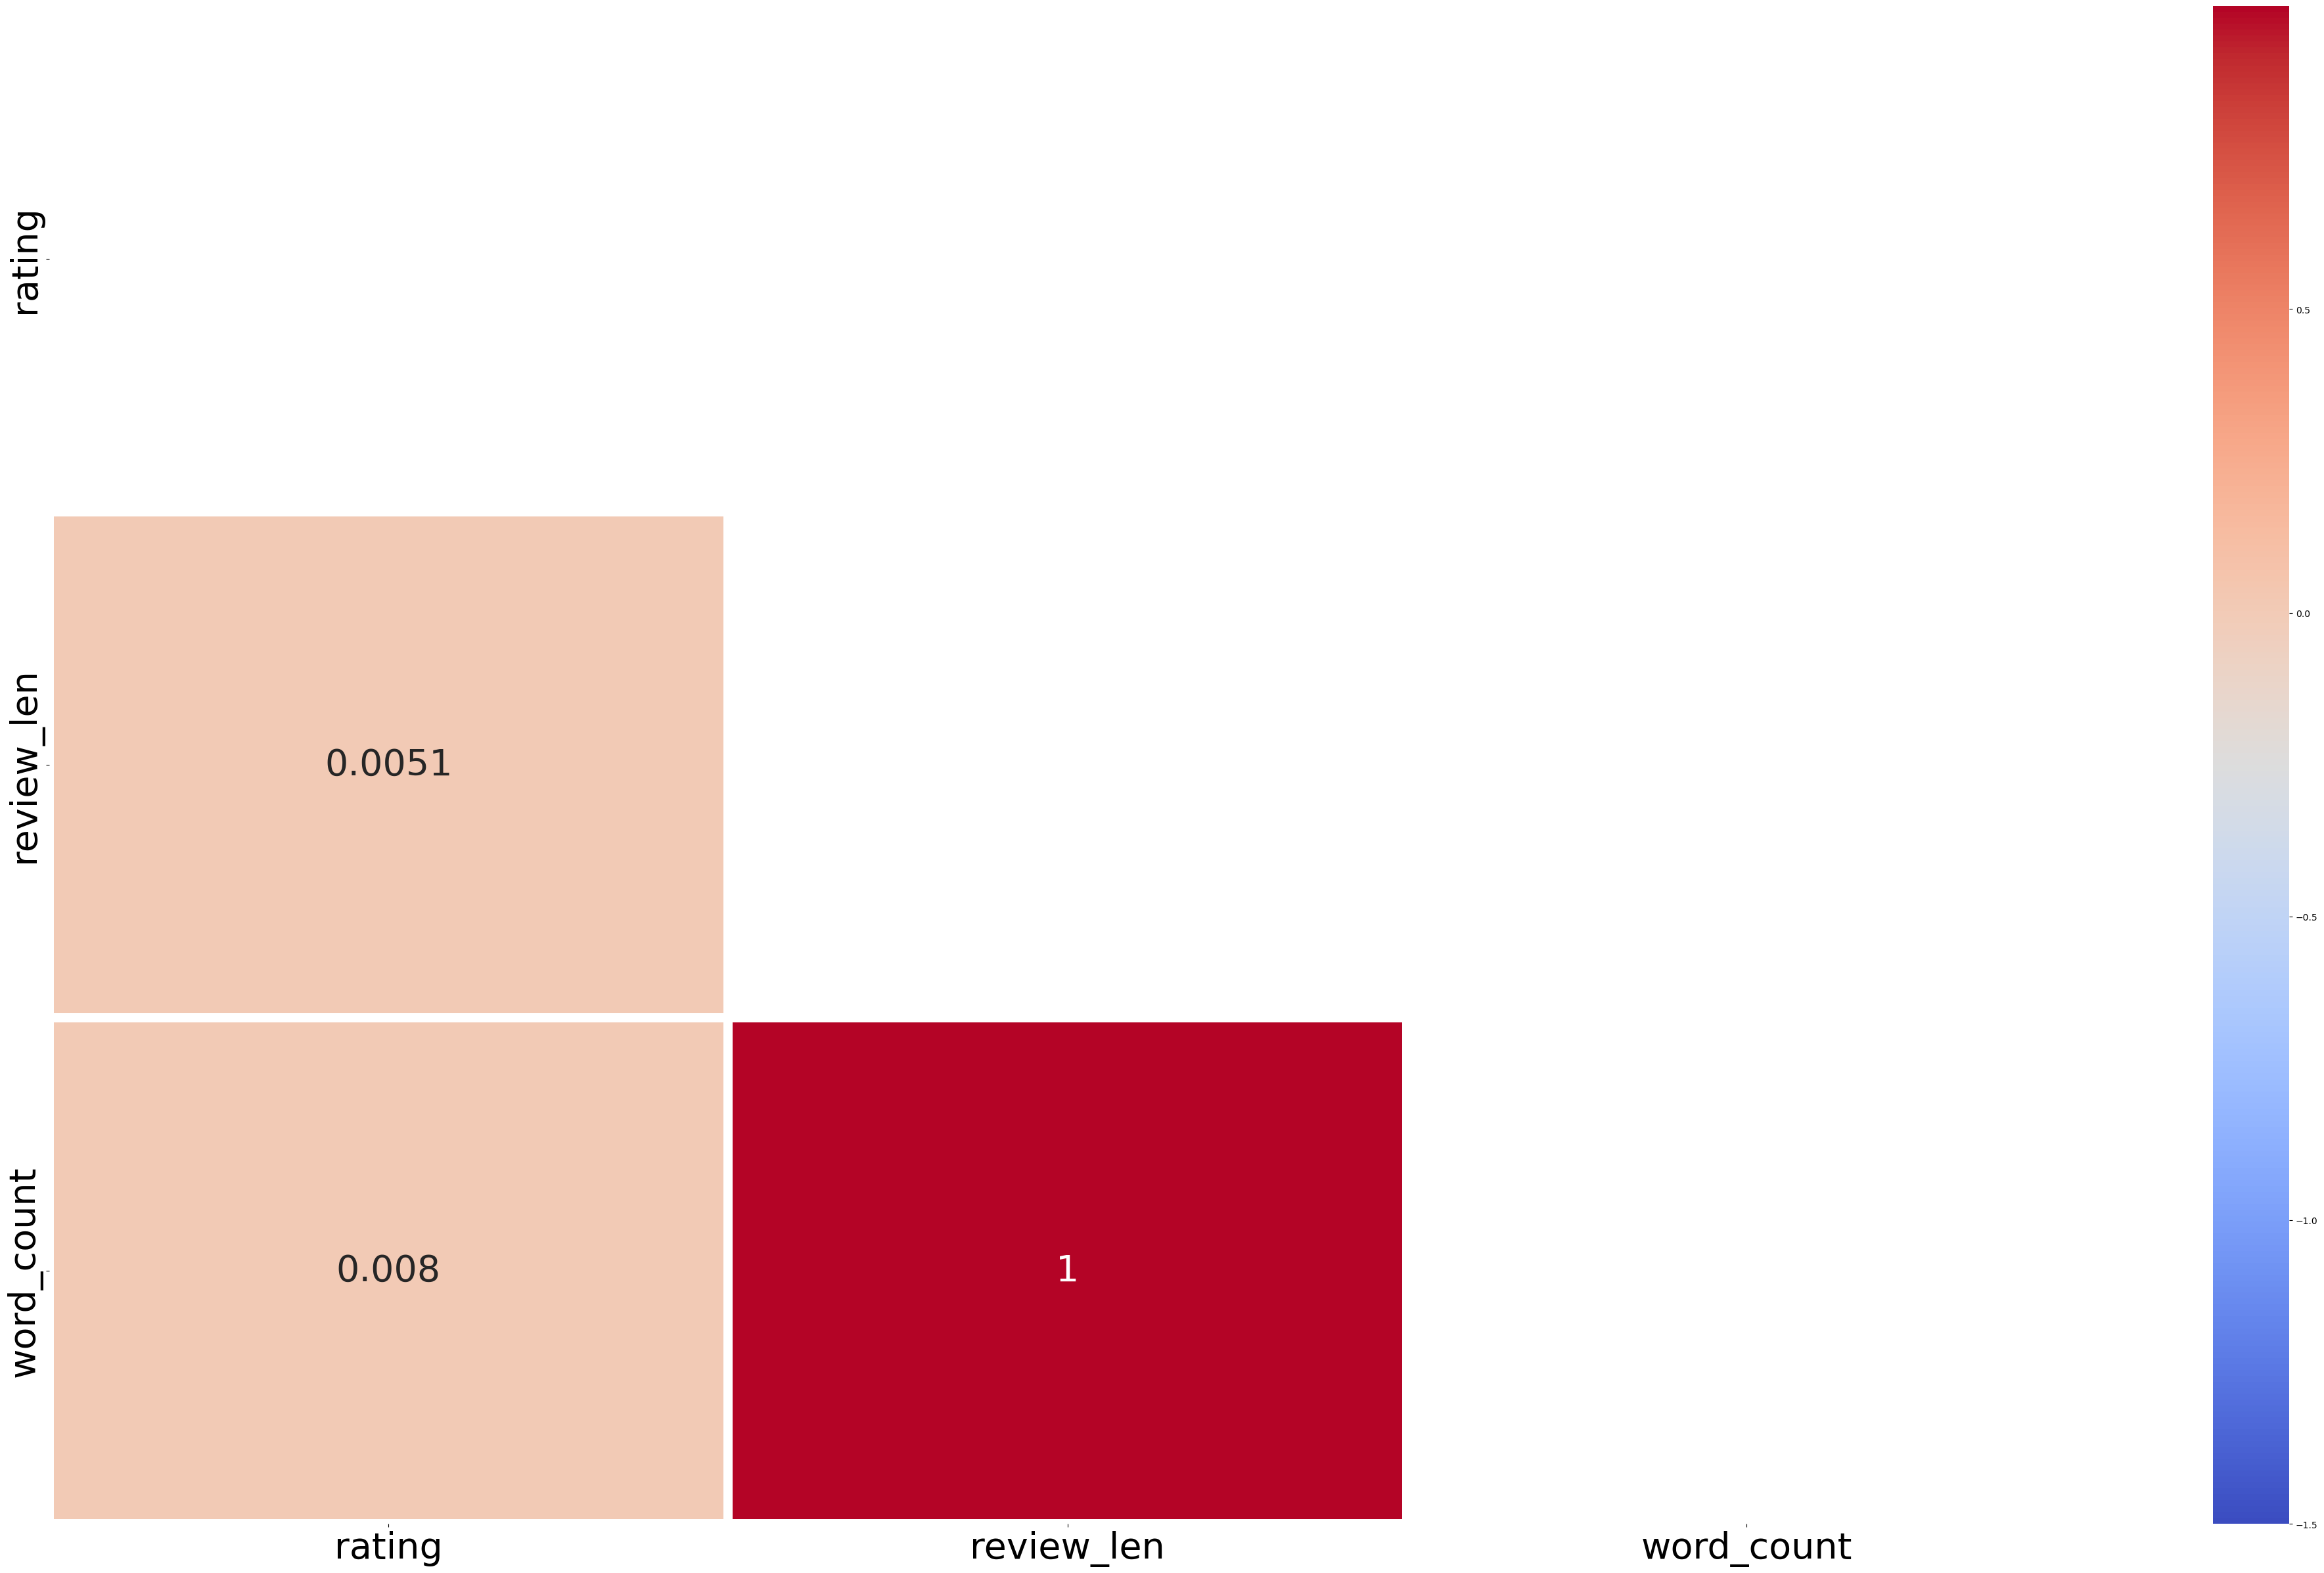

In [15]:
correlation = review[['rating', 'review_len', 'word_count']].corr()
import numpy as np
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

## Method 1: NMF Analysis

In [16]:
import pandas as pd
import re
import string

# Nonnegative Matrix Factorization(NMF) Demo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/rebeccabi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rebeccabi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccabi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rebeccabi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### (1) Prepare data before Training Model: Noun extract and lemmatize function

In [17]:
def nouns(text):
    '''Given a string of text, tokenize the text 
    #and pull out only the nouns.''' 
    
    # create mask to isolate words that are nouns
    is_noun = lambda pos: pos[:2] == 'NN'    
    
    # store function to split string of words 
    # into a list of words (tokens)
    tokenized = word_tokenize(text)    
    
    # store function to lemmatize each word
    wordnet_lemmatizer = WordNetLemmatizer()    
    
    # use list comprehension to lemmatize all words 
    # and create a list of all nouns
    all_nouns = [wordnet_lemmatizer.lemmatize(word) \
    for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    
    #return string of joined list of nouns
    return ' '.join(all_nouns)

# Create dataframe of only nouns from reviews
data_nouns = pd.DataFrame(review.text.apply(nouns))

# Visually Inspect
data_nouns.head()

text
0  trouble paperwhite voyage thing paperwhite mon...
1  history reader Nook Simple Touch Harry Potter ...
2             Great reading Fire Fire eye Paperwhite
3  Paperwhites companion Ive read average book da...
4  coroporate stuff anything Apple case Amazon de...

In [18]:
# Add additional stop words since we are recreating the document-term matrix
stop_noun = ["today", 'tomorrow', 'yesterday']
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

# Create a document-term matrix with only nouns

# Store TF-IDF Vectorizer
tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = .8, min_df = .01)


# Fit and Transform review noun text to a TF-IDF Doc-Term Matrix
data_tv_noun = tv_noun.fit_transform(data_nouns.text)

# Create data-frame of Doc-Term Matrix with nouns as column names
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())

# Set President's Names as Index
data_dtm_noun.index = review.index

# Visually inspect Document Term Matrix
data_dtm_noun.head()

/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ability  access   account  accurate    action   ad  adapter  adding  \
0      0.0     0.0  0.000000       0.0  0.000000  0.0      0.0     0.0   
1      0.0     0.0  0.000000       0.0  0.000000  0.0      0.0     0.0   
2      0.0     0.0  0.000000       0.0  0.000000  0.0      0.0     0.0   
3      0.0     0.0  0.000000       0.0  0.301576  0.0      0.0     0.0   
4      0.0     0.0  0.138157       0.0  0.000000  0.0      0.0     0.0   

   addition  air  ...  wife  wifi  woman  word  work  workaround     world  \
0       0.0  0.0  ...   0.0   0.0    0.0   0.0   0.0         0.0  0.000000   
1       0.0  0.0  ...   0.0   0.0    0.0   0.0   0.0         0.0  0.163625   
2       0.0  0.0  ...   0.0   0.0    0.0   0.0   0.0         0.0  0.000000   
3       0.0  0.0  ...   0.0   0.0    0.0   0.0   0.0         0.0  0.142652   
4       0.0  0.0  ...   0.0   0.0    0.0   0.0   0.0         0.0  0.000000   

   worth      year  youtube  
0    0.0  0.000000      0.0  
1    0.0  0.085114      0.0  
2    0.0  0.000000      0.0  
3    0.0  0.074205      0.0  
4    0.0  0.076497      0.0  

[5 rows x 510 columns]

### (2) NMF Model Training

In [19]:
def display_topics(model, feature_names, num_top_words,topic_names=None):
    '''Given an NMF model, feature_names, and number of top words, print topic number 
    and its top feature names, up to specified number of top words.'''    
    
    # iterate through topics in topic-term matrix, 'H' aka
    # model.components_
    for ix, topic in enumerate(model.components_):        
        
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [20]:
nmf_model = NMF(2)

# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
doc_topic = nmf_model.fit_transform(data_dtm_noun)

# Extract top words from the topic-term matrix 'H' 
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
kindle, amazon, tablet, device, echo

Topic  1
headphone, ear, apple, bud, people


/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(data_dtm_noun)
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
kindle, book, paperwhite, year, device

Topic  1
headphone, apple, bud, people, year

Topic  2
echo, tap, speaker, alexa, sound

Topic  3
prime, movie, amazon, tv, comcast

Topic  4
headphone, magnet, ear, set, earbuds

Topic  5
tablet, camera, hd, thing, hdx

Topic  6
case, response, tablet, reader, review

Topic  7
roku, tv, box, content, apple


/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/rebeccabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Method 2: LDA Analysis

### (1) Prepare data for LDA Analysis
### Transform the textual data in a format as an input for training LDA models

In [22]:
# Tokenize the text
# !pip install gensim
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentences), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]

data = review.cleaned_text.values.tolist()
data_words = list(sent_to_words(data))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccabi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['initially', 'trouble', 'deciding', 'paperwhite', 'voyage', 'reviews', 'less', 'said', 'thing', 'paperwhite', 'great', 'spending', 'money', 'go', 'voyage', 'fortunately', 'friends', 'owned', 'ended', 'buying', 'paperwhite', 'basis', 'models', 'ppi', 'dollar', 'jump', 'turns', 'pricey', 'voyage', 'page']


In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View 
print(corpus[:1][0][:30])

[(0, 6), (1, 1), (2, 3), (3, 54), (4, 2), (5, 327), (6, 1), (7, 6), (8, 49), (9, 1), (10, 5), (11, 1), (12, 2), (13, 6), (14, 1), (15, 2), (16, 1), (17, 171), (18, 27), (19, 4), (20, 17), (21, 2), (22, 3), (23, 4), (24, 1), (25, 38), (26, 2), (27, 1), (28, 1), (29, 1)]


### (2) LDA Model Training

### For this assignment, I will build a model with 8 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic
### Notes: I will keep all the parameters to default except for inputting the number of topics

In [25]:
from pprint import pprint

# number of topics
num_topics = 8

# Build LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=num_topics)

# Print the Keyword in the 8 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"kindle" + 0.011*"amazon" + 0.010*"like" + 0.008*"fire" + 0.007*"one" '
  '+ 0.006*"great" + 0.006*"tv" + 0.006*"headphones" + 0.006*"read" + '
  '0.006*"prime"'),
 (1,
  '0.012*"amazon" + 0.011*"kindle" + 0.011*"fire" + 0.009*"like" + '
  '0.008*"great" + 0.008*"one" + 0.007*"screen" + 0.007*"prime" + 0.007*"use" '
  '+ 0.006*"sound"'),
 (2,
  '0.012*"amazon" + 0.012*"fire" + 0.011*"like" + 0.010*"kindle" + 0.007*"use" '
  '+ 0.007*"sound" + 0.007*"great" + 0.006*"one" + 0.006*"hdx" + '
  '0.006*"prime"'),
 (3,
  '0.012*"kindle" + 0.011*"amazon" + 0.010*"fire" + 0.008*"like" + '
  '0.007*"headphones" + 0.007*"read" + 0.007*"prime" + 0.007*"tv" + '
  '0.007*"use" + 0.006*"would"'),
 (4,
  '0.012*"amazon" + 0.011*"like" + 0.010*"fire" + 0.009*"kindle" + '
  '0.008*"read" + 0.007*"use" + 0.007*"sound" + 0.006*"headphones" + '
  '0.006*"device" + 0.006*"great"'),
 (5,
  '0.013*"kindle" + 0.011*"amazon" + 0.009*"like" + 0.008*"device" + '
  '0.008*"fire" + 0.008*"use" + 0.007

### Calculating Model Perplexity

In [26]:
perplexity = lda_model.log_perplexity(corpus)
print(perplexity)

-7.094585611472711
